In [1]:
!pip install sdv

# SDV Demo

In [2]:
from sdv import load_demo
metadata, tables = load_demo(metadata=True)


In [3]:
metadata

Metadata
  root_path: .
  tables: ['users', 'sessions', 'transactions']
  relationships:
    sessions.user_id -> users.user_id
    transactions.session_id -> sessions.session_id

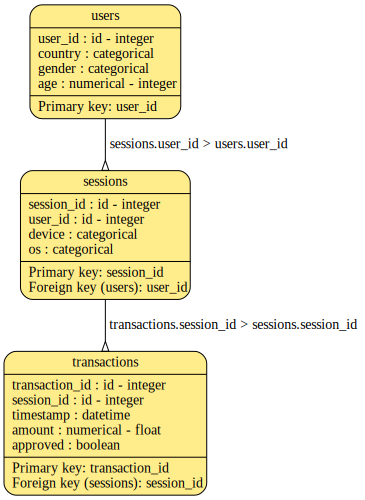

In [4]:
metadata.visualize()

In [5]:
tables

{'users':    user_id country gender  age
 0        0      US      M   34
 1        1      UK      F   23
 2        2      ES   None   44
 3        3      UK      M   22
 4        4      US      F   54
 5        5      DE      M   57
 6        6      BG      F   45
 7        7      ES   None   41
 8        8      FR      F   23
 9        9      UK   None   30,
 'sessions':    session_id  user_id  device       os
 0           0        0  mobile  android
 1           1        1  tablet      ios
 2           2        1  tablet  android
 3           3        2  mobile  android
 4           4        4  mobile      ios
 5           5        5  mobile  android
 6           6        6  mobile      ios
 7           7        6  tablet      ios
 8           8        6  mobile      ios
 9           9        8  tablet      ios,
 'transactions':    transaction_id  session_id           timestamp  amount  approved
 0               0           0 2019-01-01 12:34:32   100.0      True
 1               1  

In [6]:
from sdv import SDV

sdv = SDV()
sdv.fit(metadata, tables)

In [7]:
sdv.sample_all()

{'users':    user_id country gender  age
 0        0      DE      M   46
 1        1      DE      M   41
 2        2      UK      M   27
 3        3      US      M   58
 4        4      US      F   31
 5        5      ES    NaN   34
 6        6      UK      F   37
 7        7      UK      M   40
 8        8      ES      F   45
 9        9      FR    NaN   40,
 'sessions':     session_id  user_id  device   os
 0            0        0  tablet  ios
 1            1        0  tablet  ios
 2            2        1  mobile  ios
 3            3        2  tablet  ios
 4            4        5  tablet  ios
 5            5        5  tablet  ios
 6            6        5  tablet  ios
 7            7        6  mobile  ios
 8            8        8  mobile  ios
 9            9        8  mobile  ios
 10          10        9  tablet  ios
 11          11        9  mobile  ios,
 'transactions':    transaction_id  session_id           timestamp      amount  approved
 0               0           2 2019-01-21 

# Synthesize the data

In [8]:
import pandas as pd

ratings_df = pd.read_csv("../data/restaurant_data_reformatted/ratings.csv")
users_df = pd.read_csv("../data/restaurant_data_reformatted/users.csv")
restaurants_df = pd.read_csv("../data/restaurant_data_reformatted/restaurants.csv")

In [9]:
ratings_df.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [10]:
users_df.head()

,userID,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,...,Swiss,Tapas,Tea_House,Tex-Mex,Thai,Tibetan,Tunisian,Turkish,Vegetarian,Vietnamese
0,U1001,False,abstemious,informal,family,on foot,single,independent,1989,variety,...,0,0,0,0,0,0,0,0,0,0
1,U1002,False,abstemious,informal,family,public,single,independent,1990,technology,...,0,0,0,0,0,0,0,0,0,0
2,U1003,False,social drinker,formal,family,public,single,independent,1989,none,...,0,0,0,0,0,0,0,0,0,0
3,U1004,False,abstemious,informal,family,public,single,independent,1940,variety,...,0,0,0,0,0,0,0,0,0,0
4,U1005,False,abstemious,no preference,family,public,single,independent,1992,none,...,0,0,0,0,0,0,0,0,0,0


In [34]:
import numpy as np
users_df.iloc[[1]]["userID"]

1    U1002U1002
Name: userID, dtype: object

In [11]:
restaurants_df

,placeID,Afghan,African,American,Armenian,Asian,Bagels,Bakery,Bar,Bar_Pub_Brewery,...,Soup,Southern,Southwestern,Spanish,Steaks,Sushi,Thai,Turkish,Vegetarian,Vietnamese
0,132001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,132002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,132003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,132004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,132005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,135105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
765,135106,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
766,135107,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
767,135109,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
restaurants_df.describe()

,placeID,Afghan,African,American,Armenian,Asian,Bagels,Bakery,Bar,Bar_Pub_Brewery,...,Soup,Southern,Southwestern,Spanish,Steaks,Sushi,Thai,Turkish,Vegetarian,Vietnamese
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,...,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,132840.681404,0.001300,0.003901,0.076723,0.006502,0.009103,0.001300,0.007802,0.041612,0.031209,...,0.001300,0.001300,0.003901,0.003901,0.010403,0.007802,0.001300,0.001300,0.013004,0.002601
std,827.820287,0.036061,0.062378,0.266325,0.080424,0.095035,0.036061,0.088043,0.199832,0.173996,...,0.036061,0.036061,0.062378,0.062378,0.101530,0.088043,0.036061,0.036061,0.113365,0.050965
min,132001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,132354.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,132648.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,132894.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,135110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
_merged = pd.merge(ratings_df, users_df, on="userID")
final_df = pd.merge(_merged, restaurants_df, on="placeID")

In [14]:
final_df

,userID,placeID,rating,food_rating,service_rating,smoker,drink_level,dress_preference,ambience,transport,...,Soup_y,Southern_y,Southwestern_y,Spanish_y,Steaks_y,Sushi_y,Thai_y,Turkish_y,Vegetarian_y,Vietnamese_y
0,U1077,135085,2,2,2,False,social drinker,elegant,family,public,...,0,0,0,0,0,0,0,0,0,0
1,U1108,135085,1,2,1,False,abstemious,informal,solitary,public,...,0,0,0,0,0,0,0,0,0,0
2,U1081,135085,1,2,1,False,casual drinker,informal,family,public,...,0,0,0,0,0,0,0,0,0,0
3,U1001,135085,0,1,1,False,abstemious,informal,family,on foot,...,0,0,0,0,0,0,0,0,0,0
4,U1056,135085,2,2,2,False,social drinker,informal,family,on foot,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,U1006,132922,2,1,2,True,social drinker,no preference,friends,car owner,...,0,0,0,0,0,0,0,0,0,0
869,U1003,132937,2,2,1,False,social drinker,formal,family,public,...,0,0,0,0,0,0,0,0,0,0
870,U1027,132937,1,1,1,True,social drinker,no preference,family,public,...,0,0,0,0,0,0,0,0,0,0
871,U1029,132937,1,1,1,True,casual drinker,formal,family,public,...,0,0,0,0,0,0,0,0,0,0


In [15]:
candidate_df = final_df.drop(["placeID", "userID"], axis=1)

In [21]:
candidate_df.to_csv("../data/restaurant_data_reformatted/source.csv")

In [16]:
from sdv import Metadata

metadata = Metadata()
metadata

Metadata
  root_path: .
  tables: []
  relationships:

In [17]:
from sdv.tabular import GaussianCopula

model = GaussianCopula()
model.fit(candidate_df)

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not ma

In [18]:
syn_data = model.sample(100000)

In [19]:
syn_data

,rating,food_rating,service_rating,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,...,Soup_y,Southern_y,Southwestern_y,Spanish_y,Steaks_y,Sushi_y,Thai_y,Turkish_y,Vegetarian_y,Vietnamese_y
0,1,1,2,False,social drinker,formal,family,public,single,independent,...,0,0,0,0,0,0,0,0,0,0
1,1,2,1,False,social drinker,elegant,family,public,single,dependent,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,False,social drinker,elegant,family,public,single,independent,...,0,0,0,0,0,0,0,0,0,0
3,2,1,2,False,social drinker,elegant,family,car owner,single,independent,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,False,social drinker,elegant,family,public,single,dependent,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,2,2,False,social drinker,informal,family,public,single,independent,...,0,0,0,0,0,0,0,0,0,0
99996,1,1,1,False,casual drinker,formal,family,public,single,independent,...,0,0,0,0,0,0,0,0,0,0
99997,0,0,0,True,casual drinker,formal,family,public,single,independent,...,0,0,0,0,0,0,0,0,0,0
99998,1,0,1,True,social drinker,informal,friends,public,single,independent,...,0,0,0,0,0,0,0,0,0,0


In [20]:
syn_data.to_csv("../data/restaurant_data_reformatted/synthetic_data.csv")